# Обзорные гистограммы распределиния основных характеристик игроков

Данные 6 гистограмм отображают распределение уровня игроков по 6 отдельным характеристикам.
Гистограммы наглядно демонстрируют корелляцию между ускорением, скоростью на коротких дистанциях и дриблингом.
Длинные передачи и удары издали имеют схожие распределения, но доля хорошо бьющих несколько больше, чем хорошо пассующих, что логично.
При этом умение пробивать пенальти имеет другое распределение.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Загружаем только требуемых характеристики для экономии памяти

In [61]:
df = pd.read_csv(r'fifa_data\CompleteDataset.csv', 
                 low_memory=False, 
                 usecols=['Acceleration', 'Sprint speed', 'Dribbling', 'Penalties', 'Long passing', 'Long shots']
)

Делаем 6 отдельных группировок. <br>Готовим список с группированными датасетами, наименованиями и наименованиями полей, содержащих кол-во (любая характеристика, кроме той, по которой группировали)

In [62]:
df1 = df.groupby('Acceleration').count()
df2 = df.groupby('Sprint speed').count()
df3 = df.groupby('Dribbling').count()
df4 = df.groupby('Penalties').count()
df5 = df.groupby('Long passing').count()
df6 = df.groupby('Long shots').count()
attr = [(df1,'Acceleration','Sprint speed'), 
        (df2,'Sprint speed','Acceleration'), 
        (df3,'Dribbling','Acceleration'), 
        (df4,'Penalties','Acceleration'), 
        (df5,'Long passing','Acceleration'), 
        (df6,'Long shots','Acceleration')]

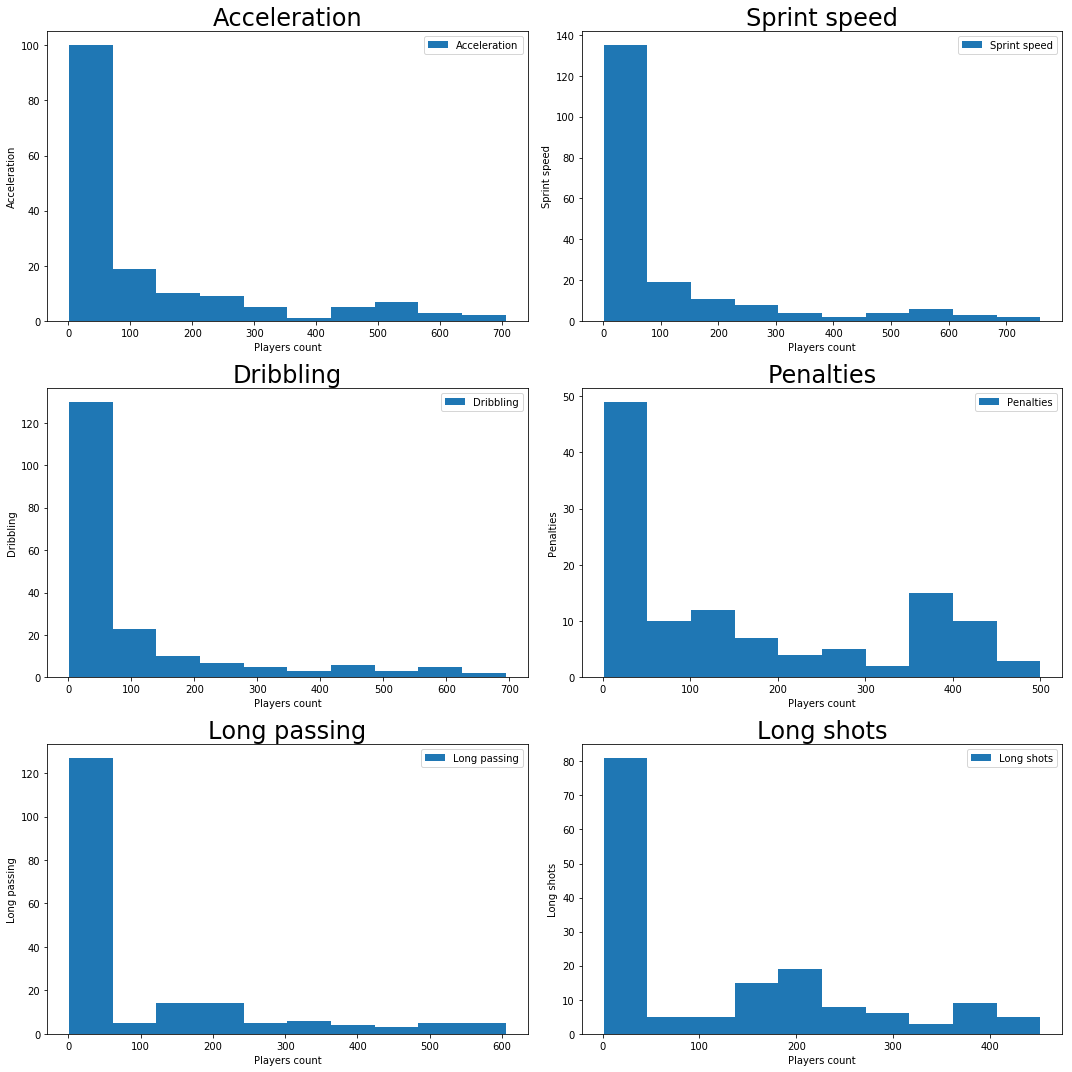

In [63]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        ax.hist(attr[i*2+j][0][attr[i*2+j][2]], label=attr[i*2+j][1])
        ax.set_title(attr[i*2+j][1], fontdict={'fontsize':24})
        ax.set_xlabel('Players count')
        ax.set_ylabel(attr[i*2+j][1])
        ax.legend()
fig.tight_layout()